# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [0]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)

b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [0]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [0]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [49]:
np.linalg.norm(BB)

0.17396672093190155

### Do the Jacobi iteration

In [0]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [51]:
# Check the result:

A @ x - b

array([ 0.00000000e+00,  5.55111512e-17,  1.11022302e-16, -5.55111512e-17,
        0.00000000e+00])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [0]:
def Jacobi_iteration(A, b, n_iter):
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)
    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B
    c = invD @ b
    x0 = np.ones(n)
    x = x0
    # print(np.linalg.norm(BB))
    for _ in range(n_iter):
        x = BB @ x + c
    return A @ x - b, 'norm of B:', np.linalg.norm(BB)

In [57]:
print(Jacobi_iteration(A, b, 100))


(array([8.50178396e+132, 8.92686042e+132, 6.74843804e+132, 6.68788988e+132,
       5.45972494e+132]), 'norm of B:', 26.89103137837967)


In [58]:
np.fill_diagonal(A, 1e-1)
print(Jacobi_iteration(A, b, 100))

#если заменить диагональные элементы соизмеримыми, норма матрицы уже будет больше 1 => расходистя


(array([8.50178396e+132, 8.92686042e+132, 6.74843804e+132, 6.68788988e+132,
       5.45972494e+132]), 'norm of B:', 26.89103137837967)


# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [0]:
from math import sqrt
import numpy as np

def Seidel_iteration(A, b, n_iter):
    x = np.zeros(len(A))
    for i in range(n_iter):                
        for j in range(len(A)):    
            x[j] = (b[j] - A[j] @ x + A[j][j] * x[j]) / A[j][j]  # формула для итерации Зейделя
    return x

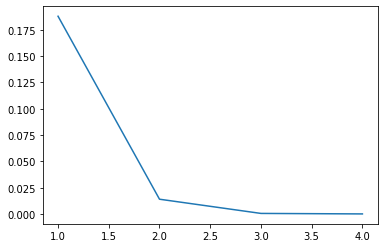

In [75]:
import matplotlib.pyplot as plt
# построим график зависимости нормы ошибки от числа итераций
plt.figure()
x = [i for i in range(1,5)]
plt.plot(x, [np.linalg.norm(A @ Seidel_iteration(A, b, i) - b) for i in x]) 
plt.show()


# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [0]:
# ... ENTER YOUR CODE HERE ...